In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q9: Break down the total sales of items geographically (division-wise)

In [30]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_name,s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " GROUP BY (i.item_name,s.division) "\
              "ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer Diet - 12 oz cans', 'BARISAL', Decimal('10118.25')),
 ('Advil 2 pill packets', 'BARISAL', Decimal('21658.0')),
 ('All Purpose Cleaner 409 Spray', 'BARISAL', Decimal('30204.0')),
 ('Altoids Small Packs Variety', 'BARISAL', Decimal('17304.0')),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'BARISAL', Decimal('19740.0')),
 ('AquaFina Purified Drinking Water 16oz', 'BARISAL', Decimal('14382.0')),
 ('Austin Cookie Cracker Variety', 'BARISAL', Decimal('21560.0')),
 ('Austin Toasty Crackers w/ PBtr', 'BARISAL', Decimal('25564.0')),
 ('Baked Chips Variety Mix Frito', 'BARISAL', Decimal('27648.0')),
 ("Barq's Root Beer - 12 oz cans", 'BARISAL', Decimal('12251.25')),
 ('Belvita Hard Biscuits Blueberry', 'BARISAL', Decimal('23179.0')),
 ('Belvita Hard Biscuits Cinnamon', 'BARISAL', Decimal('23361.0')),
 ('Belvita Protein Oats Soft Biscuit', 'BARISAL',

In [31]:
df = pd.DataFrame(list(records), columns=['Item_name', 'Division', 'total_price'])
df.head(10)

,Item_name,Division,total_price
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,A&W Root Beer - 12 oz cans,BARISAL,19101.5
2,A&W Root Beer Diet - 12 oz cans,BARISAL,10118.25
3,Advil 2 pill packets,BARISAL,21658.0
4,All Purpose Cleaner 409 Spray,BARISAL,30204.0
5,Altoids Small Packs Variety,BARISAL,17304.0
6,Apple Sauce Variety GoGO Squeeze 3.2oz,BARISAL,19740.0
7,AquaFina Purified Drinking Water 16oz,BARISAL,14382.0
8,Austin Cookie Cracker Variety,BARISAL,21560.0
9,Austin Toasty Crackers w/ PBtr,BARISAL,25564.0


In [32]:
df.Item_name.unique()

array(['100% Juice Box Variety 6.75 oz ', 'A&W Root Beer - 12 oz cans',
       'A&W Root Beer Diet - 12 oz cans', 'Advil 2 pill packets',
       'All Purpose Cleaner 409 Spray', 'Altoids Small Packs Variety',
       'Apple Sauce Variety GoGO Squeeze 3.2oz',
       'AquaFina Purified Drinking Water 16oz',
       'Austin Cookie Cracker Variety', 'Austin Toasty Crackers w/ PBtr',
       'Baked Chips Variety Mix Frito', "Barq's Root Beer - 12 oz cans",
       'Belvita Hard Biscuits Blueberry',
       'Belvita Hard Biscuits Cinnamon',
       'Belvita Protein Oats Soft Biscuit',
       'Blue Diamond Almonds Rstd, Sltd',
       'Bounty Paper Towels Select a Size ',
       'Breath Savers Peppermints 12/roll ',
       'Brisk Lemon Iced Tea - 12 oz cans',
       'Cascade Gel Packs Dishwasher', 'Cascade Gel w/ Dawn Dishwasher',
       'Charmin Ultra Bath Tissue', 'Cheese and Peanut Butter Crackers',
       "Cheetos Flamin' Hot 1 oz", 'Cheez It Original Crackers 1.5oz',
       'Cheez It White Ched

In [33]:
df['total_price'] = df['total_price'].astype(int) #float

df['total_price'] = df.groupby('Division')['total_price'].transform('sum')
print (df)

                                  Item_name Division  total_price
0           100% Juice Box Variety 6.75 oz   BARISAL      7520328
1                A&W Root Beer - 12 oz cans  BARISAL      7520328
2           A&W Root Beer Diet - 12 oz cans  BARISAL      7520328
3                      Advil 2 pill packets  BARISAL      7520328
4             All Purpose Cleaner 409 Spray  BARISAL      7520328
...                                     ...      ...          ...
1808        Welch's 100% Juice Variety10 oz   SYLHET      5512220
1809     Wint O Green LifeSavers Sugar Free   SYLHET      5512220
1810        Wonderful Pistachios (in shell)   SYLHET      5512220
1811  Yoplait Original Yogurt Variety Pack    SYLHET      5512220
1812            Zoo Animal Cookies/Crackers   SYLHET      5512220

[1813 rows x 3 columns]


In [34]:
df[['Division','total_price']] = df[['Division','total_price']].mask(df['total_price'].duplicated()).fillna('')
df.head(100)

,Item_name,Division,total_price
0,100% Juice Box Variety 6.75 oz,BARISAL,7520328.0
1,A&W Root Beer - 12 oz cans,,
2,A&W Root Beer Diet - 12 oz cans,,
3,Advil 2 pill packets,,
4,All Purpose Cleaner 409 Spray,,
...,...,...,...
95,Gatorade Variety 20 oz,,
96,Gatorade X-Factor Fierce Variety 20 oz,,
97,Gatorade Zero Variety 20 oz,,
98,Ginger Ale - 12 oz cans,,


In [35]:
df3.columns[df.isna().any()]

Index([], dtype='object')

In [40]:
df4=df3.dropna()
df4

,Item_name,Division,total_price
0,Spunkmeyer Muffin Variety,BARISAL,15040671.0
260,Lysol Disinfectant Spray 19 oz,CHITTAGONG,39527177.0
520,Premier Protein Shake Choc. 11oz,DHAKA,81529224.0
780,La Croix Sparkling Orange 12 oz,KHULNA,22623207.0
1040,Sargento String Cheese 0.75oz,RAJSHAHI,24198377.0
1300,Nature Valley Chewy Trail Mix Bars,RANGPUR,16859660.0
1560,Hershey Kisses,SYLHET,11024454.0


In [41]:
df4.total_price.unique()

array([15040671., 39527177., 81529224., 22623207., 24198377., 16859660.,
       11024454.])

In [43]:
df4.Division.unique()

array(['BARISAL', 'CHITTAGONG', 'DHAKA', 'KHULNA', 'RAJSHAHI', 'RANGPUR',
       'SYLHET'], dtype=object)

In [44]:
df4.dtypes

Item_name       object
Division        object
total_price    float64
dtype: object

In [45]:
df3['total_price'] = pd.to_numeric(df3['total_price'],errors='coerce')

In [46]:
df4.dtypes

Item_name       object
Division        object
total_price    float64
dtype: object

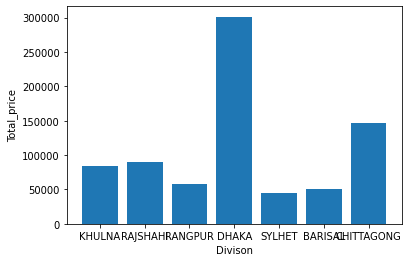

In [70]:
plt.bar(df4['Division'],df4['total_price'])
plt.xlabel('Divison')
plt.ylabel('Total_price')
plt.show()

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_key,s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              "Where i.item_key = 'I00177' " \
              " GROUP BY (i.item_key,s.division) "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('I00177', 'KHULNA', Decimal('84420.0')),
 ('I00177', 'RAJSHAHI', Decimal('89320.0')),
 ('I00177', 'RANGPUR', Decimal('57365.0')),
 ('I00177', 'DHAKA', Decimal('301350.0')),
 ('I00177', 'SYLHET', Decimal('44520.0')),
 ('I00177', 'BARISAL', Decimal('50050.0')),
 ('I00177', 'CHITTAGONG', Decimal('146335.0'))]

In [57]:
df4 = pd.DataFrame(list(records), columns=['Item_Key', 'Division', 'total_price'])
df4

,Item_Key,Division,total_price
0,I00177,KHULNA,84420.0
1,I00177,RAJSHAHI,89320.0
2,I00177,RANGPUR,57365.0
3,I00177,DHAKA,301350.0
4,I00177,SYLHET,44520.0
5,I00177,BARISAL,50050.0
6,I00177,CHITTAGONG,146335.0


In [58]:
df4.dtypes

Item_Key       object
Division       object
total_price    object
dtype: object

In [59]:
df4['total_price'] = pd.to_numeric(df4['total_price'],errors='coerce')

In [60]:
df4.dtypes

Item_Key        object
Division        object
total_price    float64
dtype: object

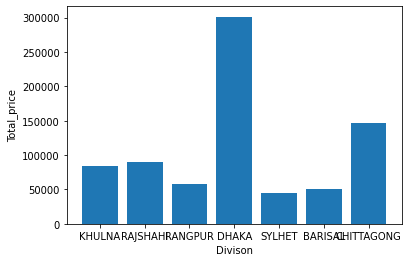

In [69]:
plt.bar(df4['Division'],df4['total_price'])
plt.xlabel('Divison')
plt.ylabel('Total_price')
plt.show()

In [74]:
df2= df4.set_index(['Division'])

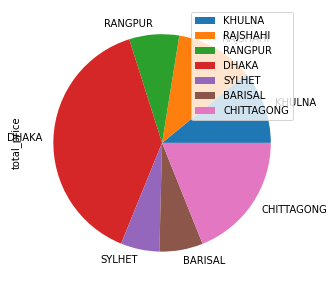

In [76]:
plot = df2.plot.pie(y='total_price', figsize=(5, 5))

<AxesSubplot:xlabel='Division'>

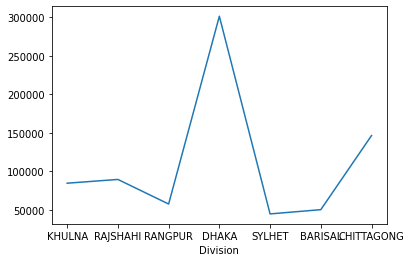

In [79]:
df4.set_index('Division')['total_price'].plot()